    In this notebook, we will create a Machine Learning model to predict diabetes.
    
### Data information

Data come from https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=diabetes_data.csv

We'll work with diabetes_data.csv, which has 17 feature variables and 1 target variable and its classes are balanced.

* **Age**: 13-level age category arranged in 5 years steps: 1 = 18-24; 2 = 25-29; ...; 9 = 60-64; ...; 13 = 80 or older.
* **Sex**: patient's gender 1 = male; 0 = female.
* **HighChol**: 0 = no high cholesterol; 1 = high cholesterol.
* **CholCheck**: 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years.
* **BMI**: Body Mass Index.
* **Smoker**: Have you smoked at least 100 cigarettes in your entire life? (Note: 5 packs = 100 cigarettes) 0 = no; 1 = yes.
* **HeartDiseaseorAttack**: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no; 1 = yes.
* **PhysActivity**: physical activity in past 30 days - not including job 0 = no; 1 = yes.
* **Fruits**: Consume Fruit 1 or more times per day 0 = no; 1 = yes.
* **Veggies**: Consume Vegetables 1 or more times per day 0 = no; 1 = yes.
* **HvyAlcoholConsump**: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no; 1 = yes.
* **GenHlth**: Would you say that in general your health is: scale 1-5 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor.
* **MentHlth**: days of poor mental health scale 1-30 days.
* **PhysHlth**: physical illness or injury days in past 30 days scale 1-30.
* **DiffWalk**: Do you have serious difficulty walking or climbing stairs? 0 = no; 1 = yes.
* **Stroke**: you ever had a stroke 0 = no; 1 = yes.
* **HighBP**: 0 = no high; BP 1 = high BP.
* **Diabetes**: 0 = no diabetes; 1 = diabetes.

### Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import ADASYN

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


## Overview Data

In [45]:
df = pd.read_csv("./Dataset/diabetes_data.csv", delimiter=",")
print("Shape of dataset:\t", df.shape)
# change to int
df = df.astype(int)
df

Shape of dataset:	 (70692, 18)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6,0,1,1,37,0,0,0,0,1,0,4,0,0,0,0,0,1
70688,10,1,1,1,29,1,1,0,1,1,0,2,0,0,1,0,0,1
70689,13,0,1,1,25,0,1,0,1,0,0,5,15,0,1,0,1,1
70690,11,0,1,1,18,0,0,0,0,0,0,4,0,0,1,0,1,1


In [46]:
# df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int32
 1   Sex                   70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   HeartDiseaseorAttack  70692 non-null  int32
 7   PhysActivity          70692 non-null  int32
 8   Fruits                70692 non-null  int32
 9   Veggies               70692 non-null  int32
 10  HvyAlcoholConsump     70692 non-null  int32
 11  GenHlth               70692 non-null  int32
 12  MentHlth              70692 non-null  int32
 13  PhysHlth              70692 non-null  int32
 14  DiffWalk              70692 non-null  int32
 15  Stroke                70692 non-null  int32
 16  High

In [47]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [48]:
print("THE NUMBER OF UNIQUE VALUES BY COLUMNS:")
df.nunique()

THE NUMBER OF UNIQUE VALUES BY COLUMNS:


Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [50]:
for col in df.columns:
    print(df[col].value_counts() , "\n")

Age
10    10856
9     10112
8      8603
11     8044
7      6872
13     5426
12     5394
6      4648
5      3520
4      2793
3      2049
2      1396
1       979
Name: count, dtype: int64 

Sex
0    38386
1    32306
Name: count, dtype: int64 

HighChol
1    37163
0    33529
Name: count, dtype: int64 

CholCheck
1    68943
0     1749
Name: count, dtype: int64 

BMI
27    6327
26    4975
28    4583
24    4392
30    4344
      ... 
85       1
83       1
80       1
78       1
74       1
Name: count, Length: 80, dtype: int64 

Smoker
0    37094
1    33598
Name: count, dtype: int64 

HeartDiseaseorAttack
0    60243
1    10449
Name: count, dtype: int64 

PhysActivity
1    49699
0    20993
Name: count, dtype: int64 

Fruits
1    43249
0    27443
Name: count, dtype: int64 

Veggies
1    55760
0    14932
Name: count, dtype: int64 

HvyAlcoholConsump
0    67672
1     3020
Name: count, dtype: int64 

GenHlth
3    23427
2    19872
4    13303
1     8282
5     5808
Name: count, dtype: int64 

MentHlth


## Preprocessing Data

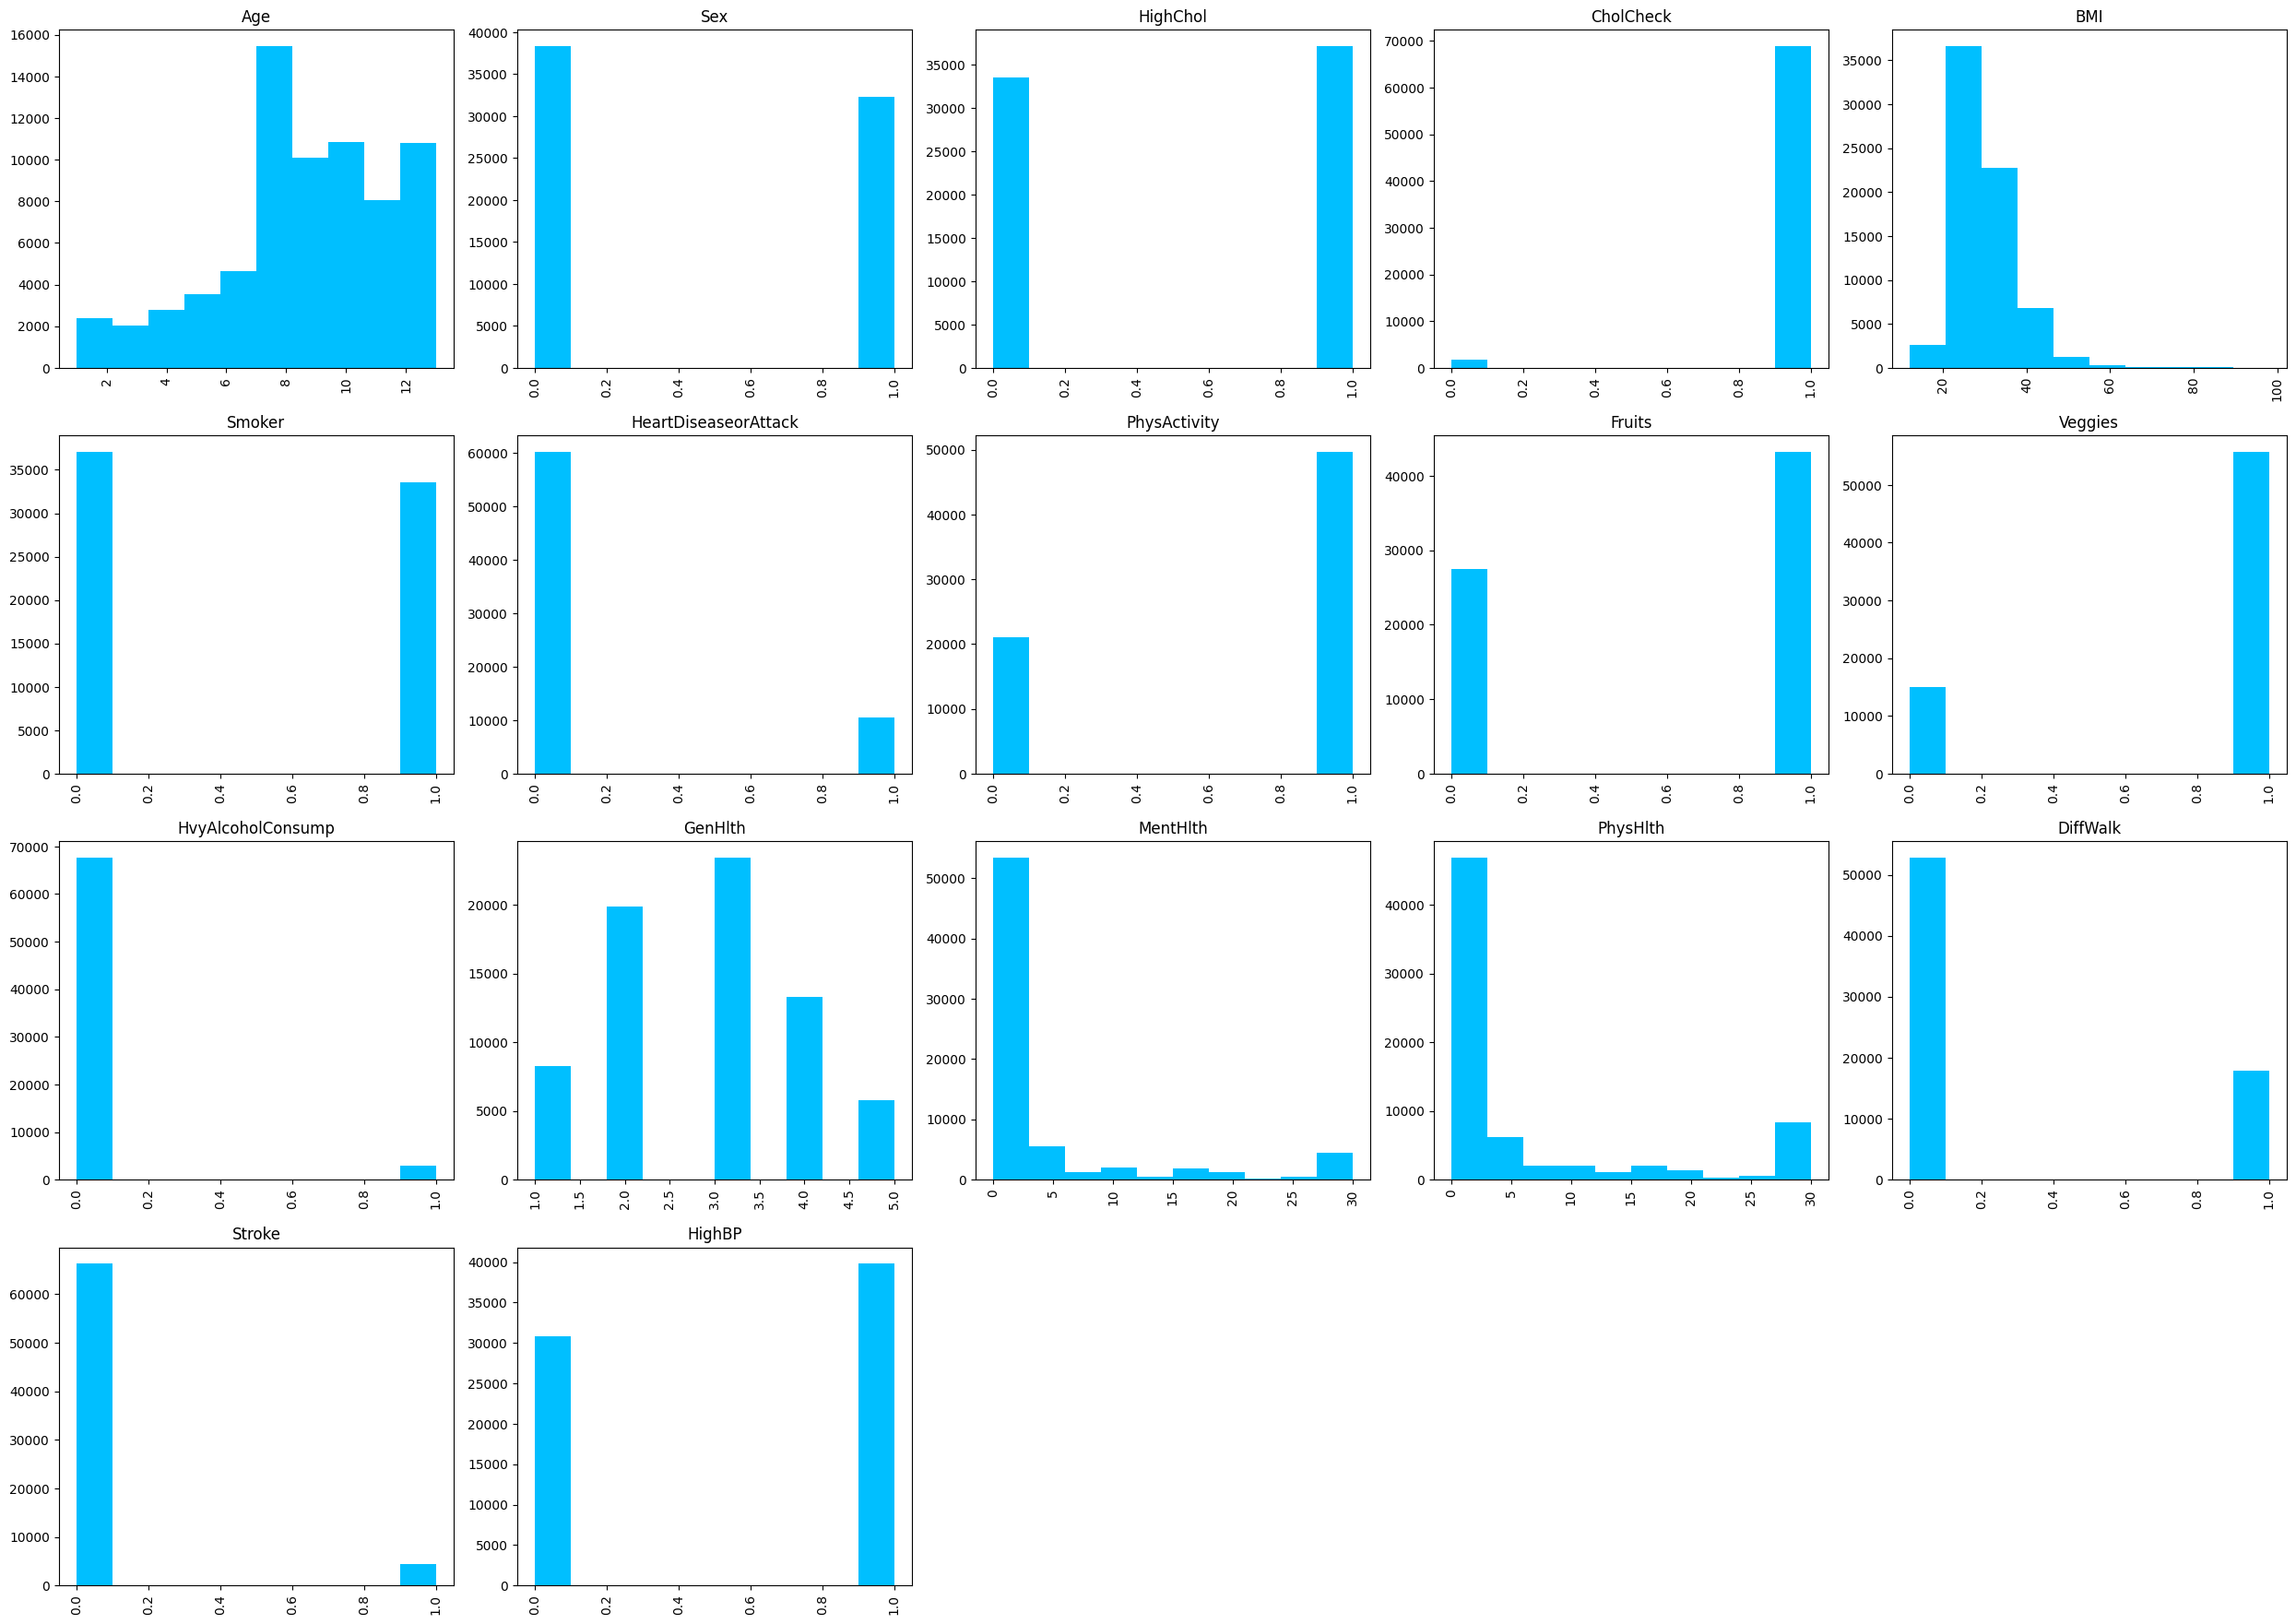

In [51]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in df.columns if x not in 'Diabetes']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

The bar plots provide visual summaries of different health-related variables from a dataset. Here's an explanation of each plot:
- Age: The age distribution is categorized into 13 groups, each representing a 5-year age range. The highest frequency is in the group aged 70-74, followed by 65-69 and 75-79.
- Sex: The dataset contains more females (0) than males (1).
- HighChol (High Cholesterol): A significant portion of the sample has high cholesterol (1).
- CholCheck (Cholesterol Check): Almost everyone in the dataset has had their cholesterol checked in the past 5 years (1).
- BMI (Body Mass Index): The BMI values are spread across a wide range, with a significant concentration around the lower end of the scale.
- Smoker: A notable portion of the sample has smoked at least 100 cigarettes in their lifetime (1).
- HeartDiseaseorAttack (Heart Disease or Attack): Most individuals in the dataset do not have a history of coronary heart disease or myocardial infarction (0).
- PhysActivity (Physical Activity): The majority of the sample has engaged in physical activity in the past 30 days (1).
- Fruits: Many individuals consume fruits one or more times per day (1).
- Veggies: Similarly, a significant portion of the sample consumes vegetables one or more times per day (1).
- HvyAlcoholConsump (Heavy Alcohol Consumption): Very few individuals consume alcohol heavily (1).
- GenHlth (General Health): The general health is distributed across the scale, with the highest frequencies in the "very good" (2) and "good" (3) categories.
- MentHlth (Mental Health): Most individuals report fewer days of poor mental health, with a concentration at the lower end of the scale (1-5 days).
- PhysHlth (Physical Health): Similar to mental health, most report fewer days of physical illness or injury, with a concentration at the lower end of the scale (1-5 days).
- DiffWalk (Difficulty Walking): Most individuals do not have difficulty walking or climbing stairs (0).
- Stroke: The vast majority have never had a stroke (0).
- HighBP (High Blood Pressure): There is a significant portion of the sample with high blood pressure (1).

Some attributes with very skewed frequencies (e.g., HvyAlcoholConsump, CholCheck) may provide less information for the model

In [52]:
#we should drop the columns with very small categories (HvyAlcoholConsump and CholCheck)
df.drop(['HvyAlcoholConsump','CholCheck'], axis=1, inplace=True)

<Axes: title={'center': 'Correlation with Diabetes'}>

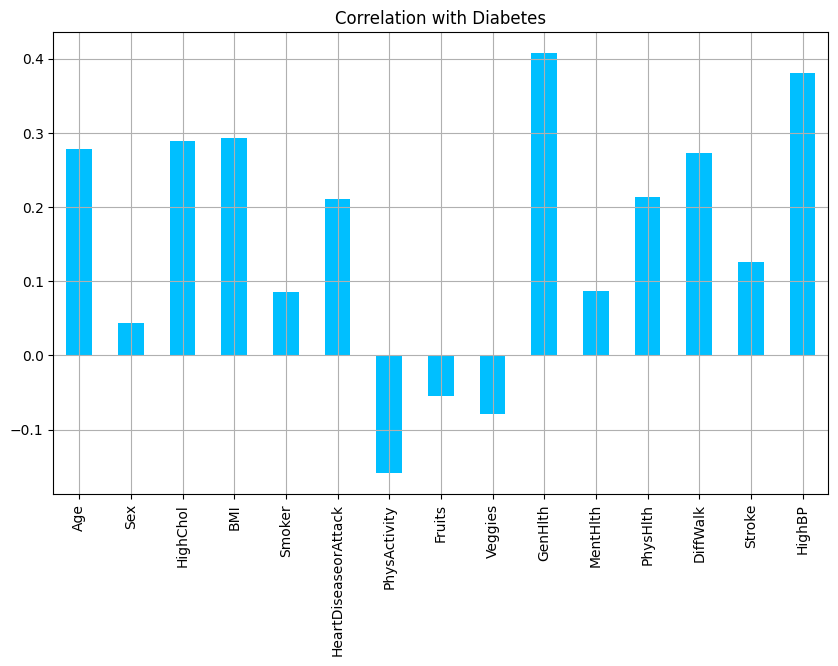

In [53]:
# check correlation of other columns with diabetes column
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue")

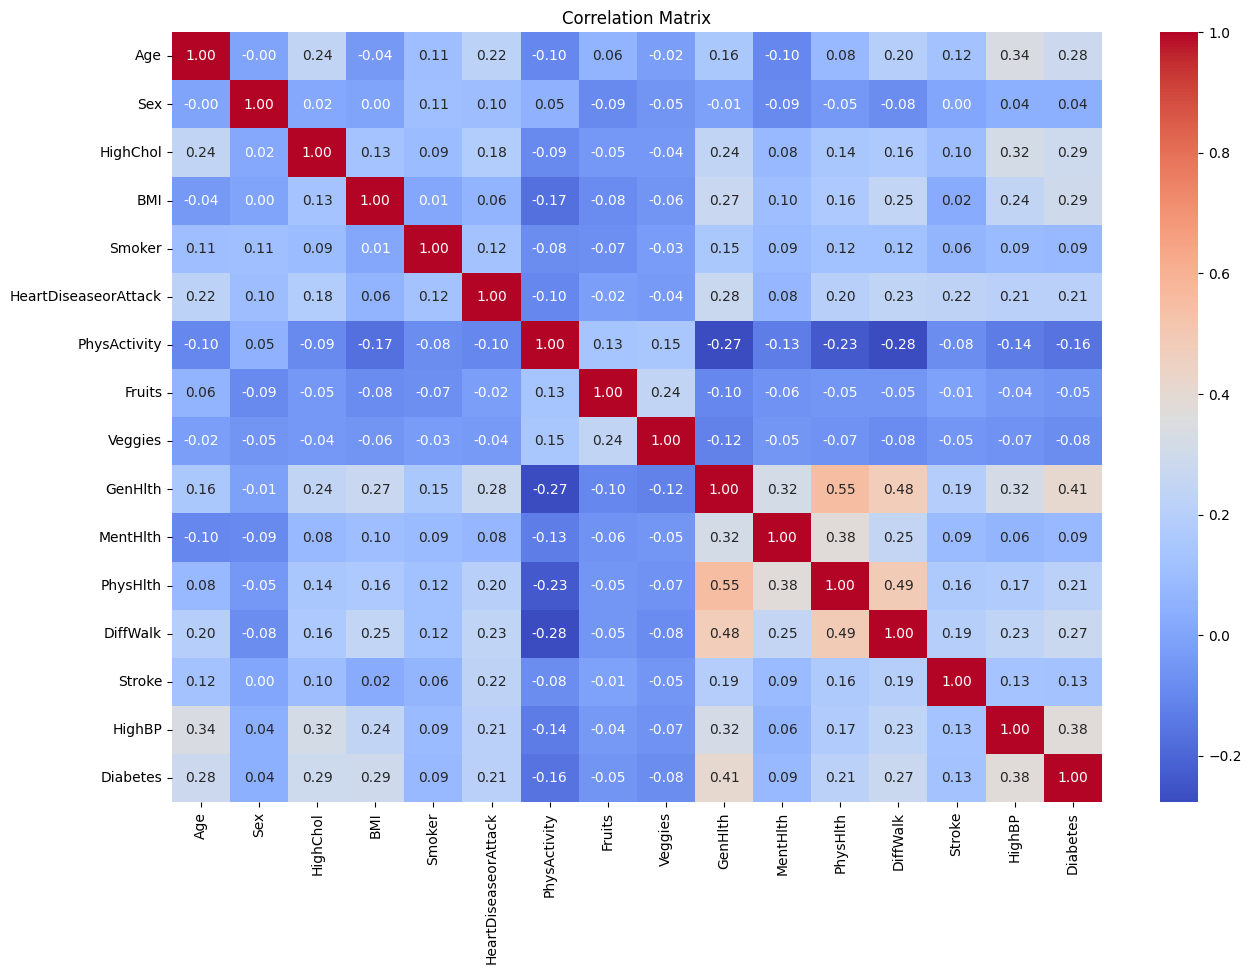

In [54]:
# Phân tích tương quan
plt.figure(figsize=(15,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Sex, Smoker, Fruits, Veggies, MentHlth because they have low correlation with Diabetes**

In [55]:
df.drop(['Sex', 'Smoker', 'Fruits', 'Veggies', 'MentHlth'], axis=1, inplace=True)

In [56]:
df.columns

Index(['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [57]:
df.nunique()

Age                     13
HighChol                 2
BMI                     80
HeartDiseaseorAttack     2
PhysActivity             2
GenHlth                  5
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

We has 3 features with missing values: BMI, GenHlth, and PhysHlth. We will fill these missing values with the median of each feature.

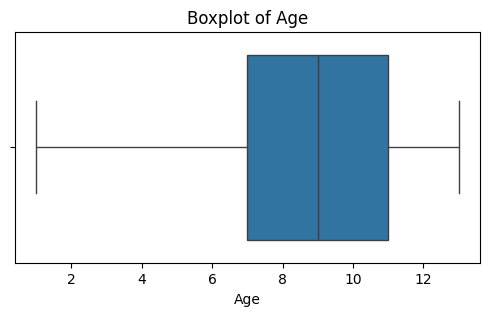

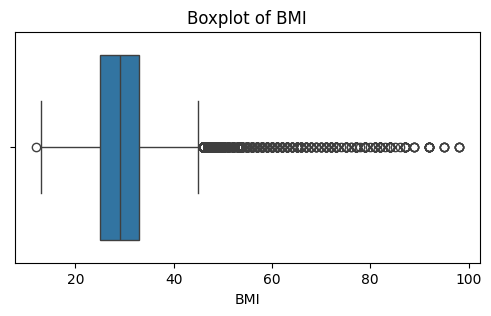

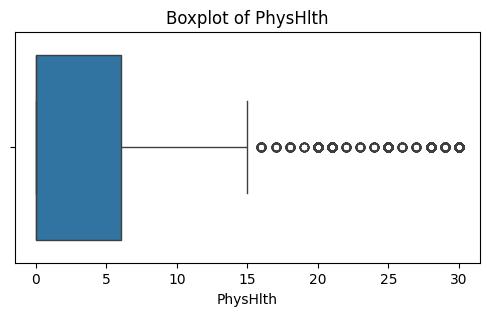

In [58]:
boxplot_col = ['Age', 'BMI', 'PhysHlth']
for col in boxplot_col :
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

BMI and PhysHlth has many outliers, which may affect the model's performance

But when I removed the outliers, the influence of BMI was reduced

In [59]:
# rm_out_col = ['BMI', 'PhysHlth']

# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# for col in rm_out_col:
#     df = remove_outliers(df, col)

In [60]:
#Check skewness
#can only be checked for numeric data

dm_skew = df[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


In [61]:
# df['PhysHlth'] = np.log1p(df['PhysHlth'])  # np.log1p để tránh log(0)

# df.drop('PhysHlth', axis=1, inplace=True)


In [62]:
df.count()

Age                     70692
HighChol                70692
BMI                     70692
HeartDiseaseorAttack    70692
PhysActivity            70692
GenHlth                 70692
PhysHlth                70692
DiffWalk                70692
Stroke                  70692
HighBP                  70692
Diabetes                70692
dtype: int64

In [63]:
df

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,0,26,0,1,3,30,0,0,1,0
1,12,1,26,0,0,3,0,0,1,1,0
2,13,0,26,0,1,1,10,0,0,0,0
3,11,1,28,0,1,3,3,0,0,1,0
4,8,0,29,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70687,6,1,37,0,0,4,0,0,0,0,1
70688,10,1,29,1,0,2,0,1,0,0,1
70689,13,1,25,1,0,5,0,1,0,1,1
70690,11,1,18,0,0,4,0,1,0,1,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int32
 1   HighChol              70692 non-null  int32
 2   BMI                   70692 non-null  int32
 3   HeartDiseaseorAttack  70692 non-null  int32
 4   PhysActivity          70692 non-null  int32
 5   GenHlth               70692 non-null  int32
 6   PhysHlth              70692 non-null  int32
 7   DiffWalk              70692 non-null  int32
 8   Stroke                70692 non-null  int32
 9   HighBP                70692 non-null  int32
 10  Diabetes              70692 non-null  int32
dtypes: int32(11)
memory usage: 3.0 MB


In [65]:
# Scaling the data for features selection using the MinMaxScaler method.
# only numeric variables apply here

mms = MinMaxScaler()
col_scaler = ['BMI', 'Age', 'PhysHlth', 'GenHlth']
df[col_scaler] = mms.fit_transform(df[col_scaler])

with open('./Scaler/minmax_scaler.pkl', 'wb') as f:
    pickle.dump(mms, f)

df

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,0,0.162791,0,1,0.50,1.000000,0,0,1,0
1,0.916667,1,0.162791,0,0,0.50,0.000000,0,1,1,0
2,1.000000,0,0.162791,0,1,0.00,0.333333,0,0,0,0
3,0.833333,1,0.186047,0,1,0.50,0.100000,0,0,1,0
4,0.583333,0,0.197674,0,1,0.25,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70687,0.416667,1,0.290698,0,0,0.75,0.000000,0,0,0,1
70688,0.750000,1,0.197674,1,0,0.25,0.000000,1,0,0,1
70689,1.000000,1,0.151163,1,0,1.00,0.000000,1,0,1,1
70690,0.833333,1,0.069767,0,0,0.75,0.000000,1,0,1,1


In [66]:
df#Features selection -step 1
#1. Define X,y
y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "Diabetes"

[0.15112578 0.05807936 0.30653576 0.02240063 0.01358563 0.13423122
 0.1274006  0.03887252 0.00896397 0.13880453]


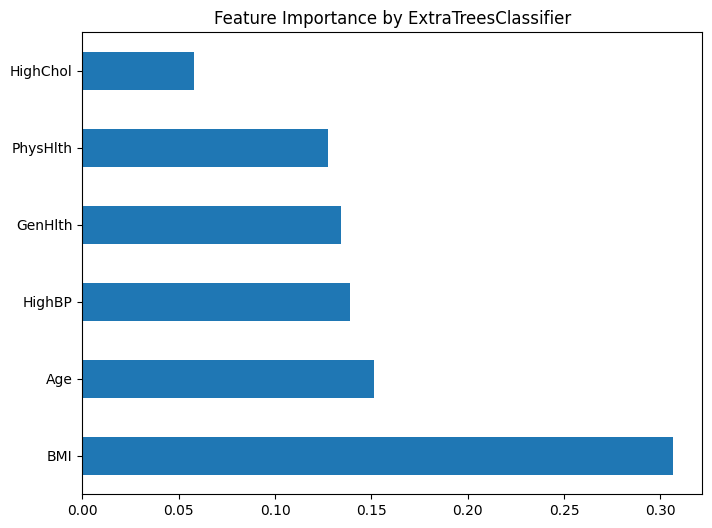

In [67]:
#step 2

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh')
plt.title("Feature Importance by ExtraTreesClassifier")
plt.show()

## Determining the “x” and “y”

In [57]:
#Data splitting

Y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "stroke"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [58]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((49484, 10), (21208, 10), (49484,), (21208,))

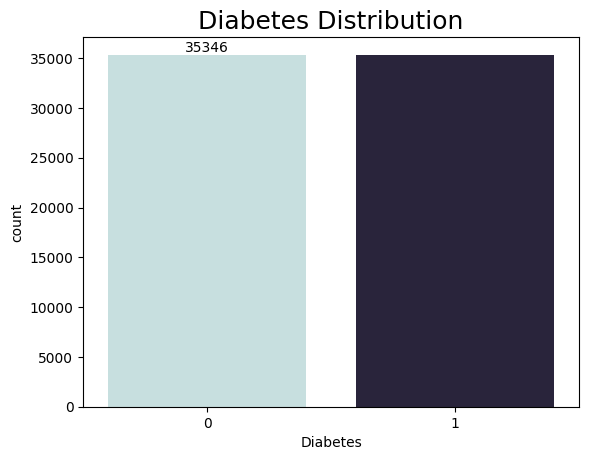

In [59]:
ax = sns.countplot(x=Y,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Diabetes Distribution', fontsize=18)
plt.show()

- There is an balance Dataset Problem

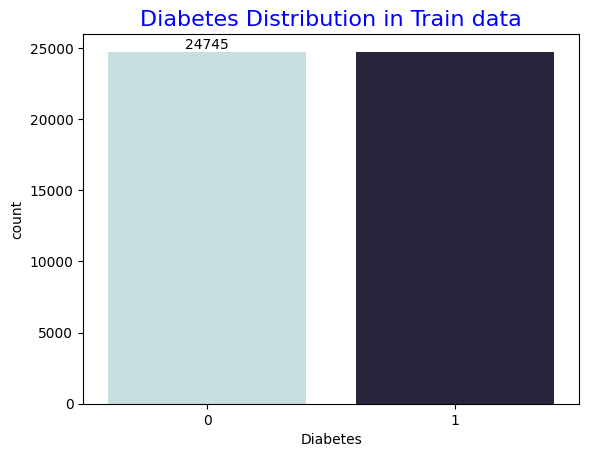

In [60]:
ax = sns.countplot(x=Y_train, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Diabetes Distribution in Train data", fontsize=16, color='b')
plt.show()

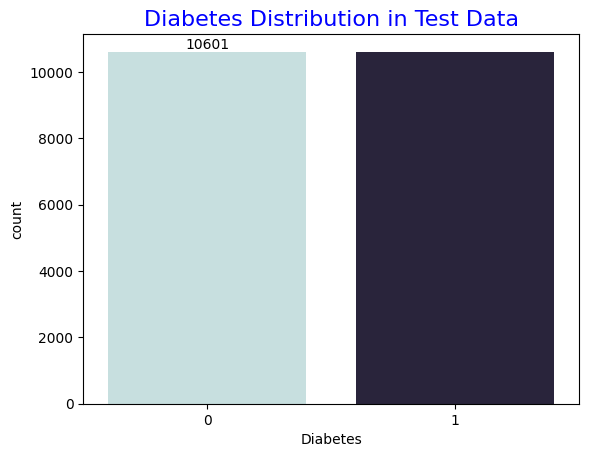

In [61]:
ax = sns.countplot(x=Y_test, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Diabetes Distribution in Test Data", fontsize=16, color='b')
plt.show()

# Methods  

## Decision Tree

In [62]:
start_time = time.time()
dt = DecisionTreeClassifier(
                max_depth=3,
                min_samples_split=2,
                min_samples_leaf=1,
                criterion='gini'
            )
dt.fit(X_train, Y_train)
end_time = time.time()

Y_pred = dt.predict(X_test)
execution_time_normal_dt = end_time - start_time

f1_dt = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_dt = metrics.accuracy_score(Y_test, Y_pred)

print(f"Execution time: {execution_time_normal_dt}")
print("F1: ", f1_dt)
print("Accuracy: ", accuracy_score_dt)

Execution time: 0.024348020553588867
F1:  0.7471239971133845
Accuracy:  0.7191154281403244


In [63]:
pickle.dump(dt, open('./Application/Models/dt.pkl', 'wb'))

## Random Forest

In [64]:
start_time = time.time()
rf = RandomForestClassifier(
                n_estimators=100,
                max_depth=3,
                min_samples_split=2,
                min_samples_leaf=1,
                criterion='gini'
            )
rf.fit(X_train, Y_train)
end_time = time.time()

Y_pred = rf.predict(X_test)
execution_time_normal_rf = end_time - start_time

f1_rf = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_rf = metrics.accuracy_score(Y_test, Y_pred)

print(f"Execution time: {execution_time_normal_rf}")
print("F1: ", f1_rf)
print("Accuracy: ", accuracy_score_rf)

Execution time: 0.7565822601318359
F1:  0.7431629013079667
Accuracy:  0.7351942663145983


In [65]:
pickle.dump(rf, open('./Application/Models/rf.pkl', 'wb'))

## K-NN

In [66]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
end_time = time.time()

Y_pred = knn.predict(X_test)
execution_time_normal_knn = end_time - start_time

f1_knn = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_knn = metrics.accuracy_score(Y_test, Y_pred)

print(f"Execution time: {execution_time_normal_knn}")
print("F1: ", f1_knn)
print("Accuracy: ", accuracy_score_knn)

Execution time: 0.08011603355407715
F1:  0.7171939477303989
Accuracy:  0.7091663523198793


In [67]:
pickle.dump(knn, open('./Application/Models/knn.pkl', 'wb'))

## Support Vector Machine

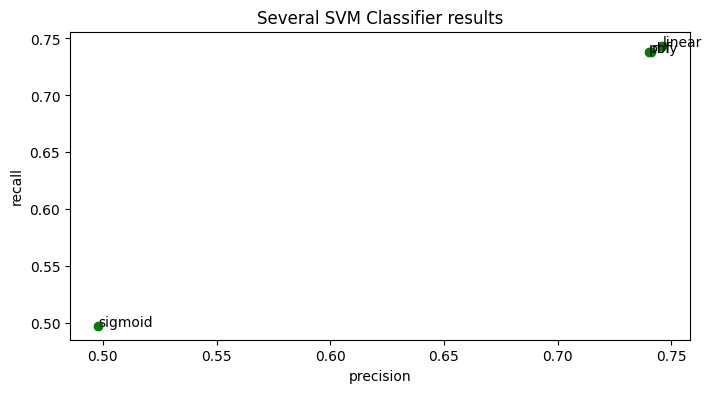

Execution time: -2.7527916431427


In [68]:
start_time = time.time()

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
results = {'precision':[], 'recall':[]}
for k in kernel:
    model = SVC(kernel=k, class_weight='balanced')
    
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    
    report = classification_report(Y_test, y_pred, output_dict=True)
    
    results['precision'].append(report['macro avg']['precision'])
    results['recall'].append(report['macro avg']['recall'])

fig = plt.figure(figsize=(8,4))
plt.plot(np.array(results['precision']), np.array(results['recall']), 'go')
for i in range(len(kernel)):
    plt.annotate(kernel[i], xy=(results['precision'][i]+2e-4,results['recall'][i]-2e-4))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Several SVM Classifier results')
plt.show()

execution_time_normal_svm = end_time - start_time
print(f"Execution time: {execution_time_normal_svm}")

As we can see, except sigmoid, all other kernels have a good performance.

In [69]:
start_time = time.time()
model_SVM = SVC(kernel='rbf', class_weight='balanced')

model_SVM.fit(X_train, Y_train)

y_pred_SVM = model_SVM.predict(X_test)



execution_time_normal_svm = end_time - start_time
f1_svm = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_svm = metrics.accuracy_score(Y_test, Y_pred)

print(f"Execution time: {execution_time_normal_svm}")
print("F1: ", f1_svm)
print("Accuracy: ", accuracy_score_svm)



Execution time: -498.53122997283936
F1:  0.7171939477303989
Accuracy:  0.7091663523198793


In [70]:
pickle.dump(knn, open('./Application/Models/svm.pkl', 'wb'))

## XGBoost

In [71]:
start_time = time.time()

model_XGB = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model_XGB.fit(X_train, Y_train)
y_pred_XGB = model.predict(X_test)

execution_time_normal_xgb = end_time - start_time
f1_xgb = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_xgb = metrics.accuracy_score(Y_test, Y_pred)

print(f"Execution time: {execution_time_normal_xgb}")
print("F1: ", f1_xgb)
print("Accuracy: ", accuracy_score_xgb)

Execution time: -652.6003937721252
F1:  0.7171939477303989
Accuracy:  0.7091663523198793


In [72]:
pickle.dump(knn, open('./Application/Models/xgb.pkl', 'wb'))

# Visualize Results

## Load trained models


In [73]:
# Decision Tree
dt = pickle.load(open('./Application/Models/dt.pkl', 'rb'))

# Random Forest
rf = pickle.load(open('./Application/Models/rf.pkl', 'rb'))

# Support Vector Machine
svm = pickle.load(open('./Application/Models/svm.pkl', 'rb'))

# XGBoost
xgb = pickle.load(open('./Application/Models/xgb.pkl', 'rb'))

# K-Nearest Neighbors
knn = pickle.load(open('./Application/Models/knn.pkl', 'rb'))

In [74]:
# Decision Tree
print("Decision Tree")

# Normal
start_time = time.time()
Y_pred = dt.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

f1_dt = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_dt = metrics.accuracy_score(Y_test, Y_pred)

print("Execution time:", execution_time)
f1_dt, accuracy_score_dt


Decision Tree
Execution time: 0.009350776672363281


(0.7471239971133845, 0.7191154281403244)

In [75]:
# Random Forest
print("Random Forest")

# Normal
start_time = time.time()
Y_pred = rf.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

f1_rf = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_rf = metrics.accuracy_score(Y_test, Y_pred)

print("Execution time:", execution_time)
f1_rf, accuracy_score_rf

Random Forest
Execution time: 0.09161996841430664


(0.7431629013079667, 0.7351942663145983)

In [76]:
# K-Nearest Neighbors
print("K-Nearest Neighbors")

# Normal
start_time = time.time()
Y_pred = knn.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

f1_knn = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_knn = metrics.accuracy_score(Y_test, Y_pred)

print("Execution time:", execution_time)
f1_knn, accuracy_score_knn

K-Nearest Neighbors
Execution time: 4.613839626312256


(0.7171939477303989, 0.7091663523198793)

In [77]:
print("Support Vector Machine")

# Normal
start_time = time.time()
Y_pred = svm.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

f1_svm = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_svm = metrics.accuracy_score(Y_test, Y_pred)

print("Execution time:", execution_time)
f1_svm, accuracy_score_svm

Support Vector Machine
Execution time: 5.040825843811035


(0.7171939477303989, 0.7091663523198793)

In [78]:
print("XGBoost")

# Normal
start_time = time.time()
Y_pred = xgb.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

f1_xgb = f1_score(Y_test, Y_pred, average='binary')
accuracy_score_xgb = metrics.accuracy_score(Y_test, Y_pred)

print("Execution time:", execution_time)
f1_xgb, accuracy_score_xgb

XGBoost
Execution time: 4.420349597930908


(0.7171939477303989, 0.7091663523198793)

## F1 Score and Accuracy Score

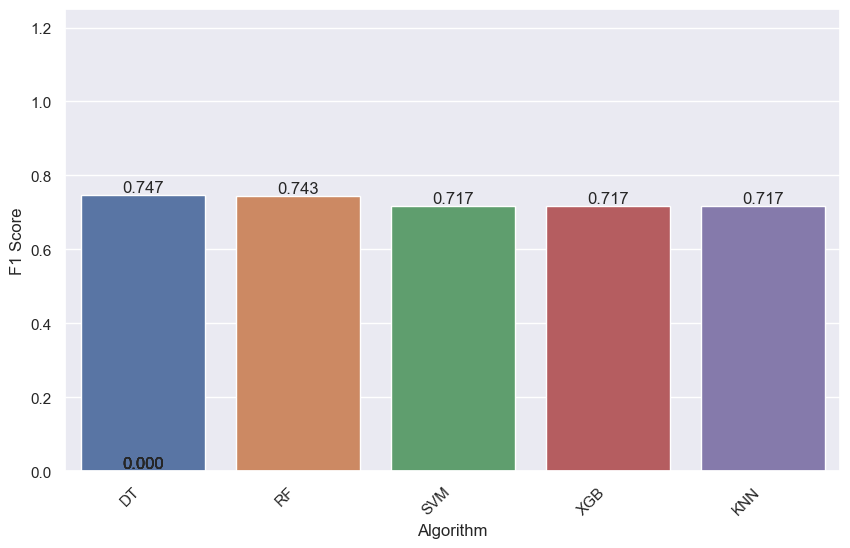

In [79]:
# Define the labels
labels = ["DT Normal", "RF Normal", "SVM Normal", "XGB Normal", "KNN Normal"]

# Define algorithms
algos_list = ["DT", "RF", "SVM", "XGB", "KNN"]

# Define the results for normal cases
normal_results = np.array([f1_dt, f1_rf, f1_svm, f1_xgb, f1_knn])

# Create the DataFrame
final_result_dict = {"result": normal_results, "algos": algos_list, "Type": labels}
df_result = pd.DataFrame(final_result_dict)

# Set a wider figure size
plt.figure(figsize=(10, 6))

# Increase the width of the bars
sns.set_theme()
plt.ylim(0, 1.25)
ax1 = sns.barplot(data=df_result, x="algos", y="result", hue="Type", saturation=0.75, ci=None)

# Adjust the position of x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove the legend if it's not needed since we only have one type
ax1.legend_.remove()

ax1.set_xlabel("Algorithm")
ax1.set_ylabel("F1 Score")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ".3f"),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

plt.show()

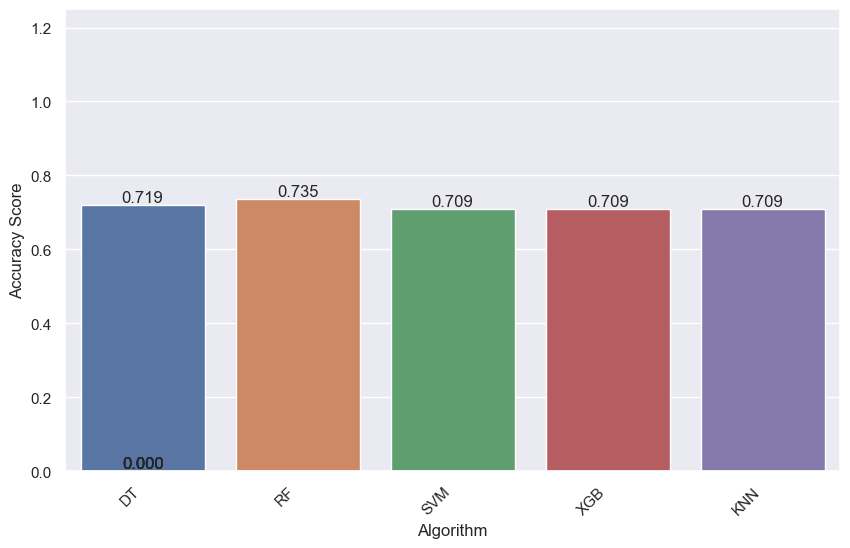

In [80]:
# Define the labels
labels = ["DT Normal", "RF Normal", "SVM Normal", "XGB Normal", "KNN Normal"]

# Define algorithms
algos_list = ["DT", "RF", "SVM", "XGB", "KNN"]

# Define the results for normal cases
normal_results = np.array([accuracy_score_dt, accuracy_score_rf, accuracy_score_svm, accuracy_score_xgb, accuracy_score_knn])

# Create the DataFrame
final_result_dict = {"result": normal_results, "algos": algos_list, "Type": labels}
df_result = pd.DataFrame(final_result_dict)

# Set a wider figure size
plt.figure(figsize=(10, 6))

# Increase the width of the bars
sns.set_theme()
plt.ylim(0, 1.25)
ax1 = sns.barplot(data=df_result, x="algos", y="result", hue="Type", saturation=0.75, ci=None)

# Adjust the position of x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove the legend if it's not needed since we only have one type
ax1.legend_.remove()

ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Accuracy Score")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ".3f"),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

plt.show()